# Homework 3
### OPER 685 - Machine Learning I
### Hosley, Brandon

In [1]:
%load_ext ipydex.displaytools
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Normalizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## 1. (50 points) 
The file flight_delays.csv contains data on more than 2K flights. Each data point contains six features: scheduled departure hour, carrier, destination, origin, weather (i.e., raining, snowing, etc), day of the week, and day of the month. Each feature is measured on a nominal scale. Each data point also contains one response variable: flight status. Apply the Naïve Bayes formula to the entire data set (25 points for correct application) and address the comments and questions given below.

In [2]:
delays_df = pd.read_csv('flight_delays.csv', usecols=range(8))
raw_nb = {}
lap_nb = {}
# L = Sample size
L = delays_df.shape[0]

raw_nb['Flight Status'] = lap_nb['Flight Status'] = {
    'ontime': delays_df['Flight Status'].value_counts()['ontime']/L, 
    'delayed': delays_df['Flight Status'].value_counts()['delayed']/L}

#   Data structure:
# dict[column][feature][flight status]
n = delays_df['Flight Status'].value_counts()[0]
for col in delays_df.columns[0:-1]:
    raw_col = {}
    lap_col = {}
    m = len(delays_df[col].unique())
    for feat in delays_df[col].unique():
        raw_col[feat] = {}
        lap_col[feat] = {}
        #n = delays_df[col].value_counts()[feat]
        try:
            n_c,n_k = delays_df[[col,'Flight Status']].value_counts()[feat]
        except:
            try:
                n_c = delays_df[[col,'Flight Status']].value_counts()[feat]['ontime']
            except:
                n_c = 0
            try:
                n_k = delays_df[[col,'Flight Status']].value_counts()[feat]['delayed']
            except:
                n_k = 0
        finally:
            raw_col[feat]['ontime'] = n_c / n
            lap_col[feat]['ontime'] = (n_c + 1)/(n+m)
            raw_col[feat]['delayed'] = (n_k) / (L-n)
            lap_col[feat]['delayed'] = (n_k + 1)/(L-n+m)
    raw_nb[col] = raw_col
    lap_nb[col] = lap_col

def nb_prob(series, coeffs):
    if 'Flight Status' in series:
        series = series.drop(labels='Flight Status')
    p,q = coeffs['Flight Status'].values()
    for col,feat in series.items():
        pq = coeffs[col][feat]
        p = p* pq['ontime']
        q = q* pq['delayed']
    return p/(p+q)

print(raw_nb)
print(lap_nb)

{'Flight Status': {'ontime': 0.805542935029532, 'delayed': 0.19445706497046797}, 'Scheduled Departure Hour': {1400: {'ontime': 0.09757473209249859, 'delayed': 0.14719626168224298}, 1600: {'ontime': 0.0823463056965595, 'delayed': 0.07476635514018691}, 1200: {'ontime': 0.06711787930062042, 'delayed': 0.053738317757009345}, 1700: {'ontime': 0.10039481105470953, 'delayed': 0.14719626168224298}, 1000: {'ontime': 0.050197405527354765, 'delayed': 0.02570093457943925}, 800: {'ontime': 0.07670614777213762, 'delayed': 0.06074766355140187}, 2100: {'ontime': 0.05696559503666103, 'delayed': 0.08411214953271028}, 900: {'ontime': 0.05470953186689227, 'delayed': 0.02570093457943925}, 2000: {'ontime': 0.024816694867456288, 'delayed': 0.02102803738317757}, 1500: {'ontime': 0.06542583192329385, 'delayed': 0.08878504672897196}, 600: {'ontime': 0.06204173716864072, 'delayed': 0.037383177570093455}, 1800: {'ontime': 0.04060913705583756, 'delayed': 0.030373831775700934}, 1300: {'ontime': 0.0772701635645798, 

### A. (10 points) Compute and show the confusion matrix.

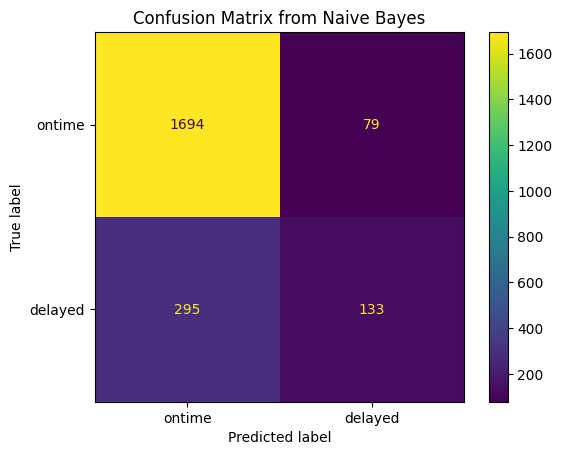

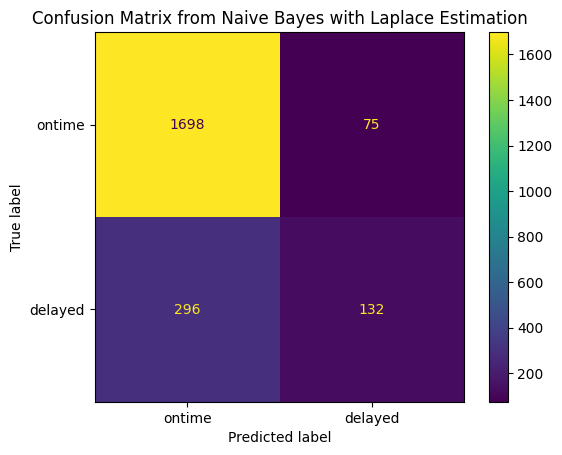

In [3]:
raw_probs = list(nb_prob(row, raw_nb) for _,row in delays_df.iterrows())
raw_preds = list('ontime' if round(a)==1 else 'delayed' for a in raw_probs)
cm_n = confusion_matrix(delays_df['Flight Status'], raw_preds, labels=delays_df['Flight Status'].unique())
disp_n = ConfusionMatrixDisplay(confusion_matrix=cm_n, display_labels=delays_df['Flight Status'].unique())
disp_n.plot()
plt.title('Confusion Matrix from Naive Bayes')
plt.show()

lap_probs = list(nb_prob(row, lap_nb) for _,row in delays_df.iterrows())
lap_preds = list('ontime' if round(a)==1 else 'delayed' for a in lap_probs)
cm_l = confusion_matrix(delays_df['Flight Status'], lap_preds, labels=delays_df['Flight Status'].unique())
disp_l = ConfusionMatrixDisplay(confusion_matrix=cm_l, display_labels=delays_df['Flight Status'].unique())
disp_l.plot()
plt.title('Confusion Matrix from Naive Bayes with Laplace Estimation')
plt.show()

### B. (5 points) What insights can you obtain from the confusion matrix? (Ensure you are using proper terminology and augmenting the terminology with "clear-text" explanations) 

The overall accuracy is improved with the laplace estimator. In both cases, the precision is quite high; the model is quite effective at identifying on-time flights correctly. The recall is lower, with a greater number of actually delayed flights predicted as being on time, in fact about 75% are incorrectly labeled. From this, it can be seen that the model favors the majority class significantly, as is often seen in asymmetric class distributions.

The F1 scores are almost exactly the same between the two.

### C. (5 points) Suppose your upcoming flight has the following features:
|   |   |
|---|---|
| Scheduled departure hour: | 1600 |
| Carrier: | US |
| Destination: | LGA |
| Origin: | DCA |
| Weather: | yes (i.e.,1) |
| Day of the week:| 6 |
| Day of the month:| 1 |

#### Using the historical data and the Naïve Bayes formula, do you think your flight will be on time or delayed?

In [4]:
d= pd.Series({
    'Scheduled Departure Hour': 1600,
    'CARRIER': 'US',
    'DEST': 'LGA',
    'ORIGIN': 'DCA',
    'Weather': 1,
    'DAY_WEEK': 6,
    'DAY_OF_MONTH': 1 })

print(nb_prob(d, raw_nb))
print(nb_prob(d, lap_nb))

nan
0.7963021307475187


/var/folders/8h/pt6dnpv520d200zx4xc71ld80000gn/T/ipykernel_58291/3428219428.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return p/(p+q)


Here we get two answers of vastly different quality. In the raw data case there is a 0/0 probability resulting from Weather always delaying a flight, but the 1st of a month always leaving on time. Under my implementation this paradox results in a NaN return. Using the laplace estimator we get a much more realistic probability of having an ~80% chance of leaving on time.

### D. (5 points) What is the probability associated with your prediction?

There is about a 79.63021307475187% probability of the flight leaving on time.

## Problem 2.
(50 points) The file wine.csv contains data on the results of a chemical analysis of 178 wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents (i.e., features) found in each of the three types of wines. The 13 features are: Alcohol, Malic Acid, Ash, Alcalinity, Magnesium, Total Phenols, Flavanoids, Nonflavoniod Phenols, Proanthocyanins, Color Intensity, Hue, OB280, and Proline. The 14th column is a labeled category stating which of the three cultivars the wine belongs to.   

(20 points for correct application) Apply the k-NN algorithm to the data and address the comments and questions given below.

In [16]:
wine_prepro = pd.read_csv('wine.csv', names=['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity', 'Magnesium', 'Total Phenols', 
                                         'Flavanoids', 'Nonflavoniod Phenols', 'Proanthocyanins', 
                                         'Color Intensity', 'Hue', 'OB280', 'Proline', 'Cultivar'])

# Normalize
wine_df = wine_prepro.copy()
df1 = wine_prepro.select_dtypes(np.number)
wine_df[df1.columns]=(df1-df1.min())/(df1.max()-df1.min())
wine_df['Cultivar'] = wine_prepro['Cultivar']
wine_df.head()

,Alcohol,Malic Acid,Ash,Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavoniod Phenols,Proanthocyanins,Color Intensity,Hue,OB280,Proline,Cultivar
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


/var/folders/8h/pt6dnpv520d200zx4xc71ld80000gn/T/ipykernel_58291/2062275925.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  wine_k_labels[i,j] = stats.mode(wine_sorted_labels[i,1:j])[0][0]


[  0. 169. 169. 170. 172. 170. 169. 170. 172. 170.]


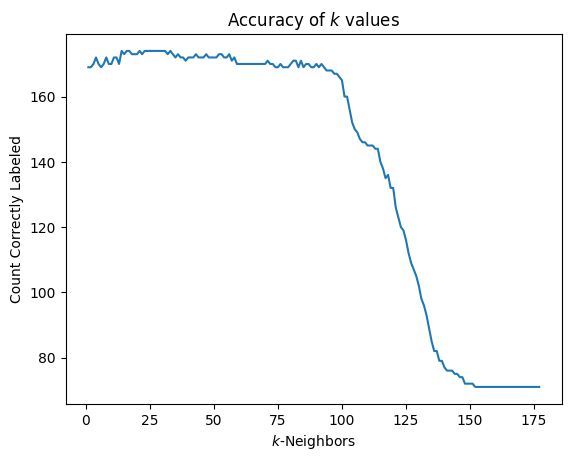

In [17]:
wine_euc = np.zeros((wine_df.shape[0],wine_df.shape[0]))

for i in range(wine_df.shape[0]):
    for j in range(i,wine_df.shape[0]):
        wine_euc[i,j] = wine_euc[j,i] = np.linalg.norm(wine_df.iloc[i,:-1]- wine_df.iloc[j,:-1])

wine_sorted_labels = np.array([wine_df['Cultivar'][i] for i in np.argsort(wine_euc)])
wine_k_labels = np.zeros(wine_sorted_labels.shape)

for i in range(wine_sorted_labels.shape[0]):
    wine_k_labels[i,[0,1]] = wine_sorted_labels[i,[0,1]]
    for j in range(2,wine_sorted_labels.shape[1]):
        wine_k_labels[i,j] = stats.mode(wine_sorted_labels[i,1:j])[0][0]

wine_correct_ks = np.zeros(wine_k_labels.shape[1])
for i in range(1,wine_k_labels.shape[1]):
    wine_correct_ks[i] = np.count_nonzero(wine_k_labels[:,0]==wine_k_labels[:,i])

sns.lineplot(x=range(1,len(wine_correct_ks)), y=wine_correct_ks[1:]) \
    .set(title='Accuracy of $k$ values', xlabel = '$k$-Neighbors', ylabel ='Count Correctly Labeled')

print(wine_correct_ks[0:10])

### A. (10 points) Find a good value for k. Defend your choice using appropriate methodologies. 

While $k$ = 1 or 2 has the highest value of correct this low of a $k$ has a very high risk of being overfit. There are a fair number of reasonably accurate choices after that value; there is an immediate drop in accuracy that can be seen in the graph, followed by a gradual increase before dropping to a value that is likely the count of the majority class's members. The peak in that area is around $k=30$ to $45$. This dataset is reasonably small enough to use that $k$ value on a machine.

### B. (10 points) Compute and show the confusion matrix.

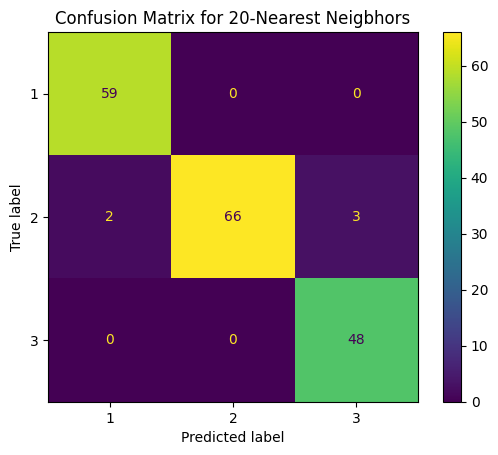

In [28]:

lap_preds = list('ontime' if round(a)==1 else 'delayed' for a in lap_probs)
wine_k_labels

k = 20

cm_k = confusion_matrix(wine_k_labels[:,0], wine_k_labels[:,k], labels=[1,2,3])
disp_k = ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=[1,2,3])
disp_k.plot()
plt.title(f'Confusion Matrix for {k}-Nearest Neigbhors')
plt.show()

### C. (5 points) What insights can you obtain from the confusion matrix? (Ensure you are using proper terminology and augmenting the terminology with "clear-text" explanations) 

This model has approximately 97% accuracy overall. The recall is perfect on the original dataset for cultivars 1 and 3, though there are a small number of misclassifications reducing the precision slightly. In the case of cultivar 2 the opposite is true. In simpler terms, this model performs very well at correctly identifying cultivars 1 and 3 and when it misclassifies it appears to generally mistake a cultivar 2 for one of the others. 


### D. (5 points) Predict the wine cultivar of the following sample point:
Xsample= [11.96   1.63   2.43   17.1   93   2.8   2.74   0.53   1.46   2.6   0.99   3.69   880]

In [37]:
x = np.array([[11.96, 1.63, 2.43, 17.1, 93, 2.8, 2.74, 0.53, 1.46, 2.6, 0.99, 3.69, 880, 0]])
dfx = pd.DataFrame(x, columns=df1.columns)
xsample[df1.columns]=(dfx-df1.min())/(df1.max()-df1.min())

print( stats.mode( [wine_df['Cultivar'][i] for i in np.argsort([np.linalg.norm(row) for _,row in (wine_df.iloc[:,:-1]-xsample).iterrows()])] [:k])[0][0] )
#print( [wine_df['Cultivar'][i] for i in np.argsort([np.linalg.norm(row) for _,row in (wine_df.iloc[:,:-1]-xsample).iterrows()])] )
# Pythonic

2


/var/folders/8h/pt6dnpv520d200zx4xc71ld80000gn/T/ipykernel_58291/401270956.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print( stats.mode( [wine_df['Cultivar'][i] for i in np.argsort([np.linalg.norm(row) for _,row in (wine_df.iloc[:,:-1]-xsample).iterrows()])] [:k])[0][0] )


Based on the information above, we will predict that this sample will have come from cultivar 2.